In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
nutrient =pd.read_csv("nutrient.csv",index_col=0)
nutrient.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [3]:
scaler = StandardScaler()
nutrient_scaled = scaler.fit_transform(nutrient)

In [4]:
nutrient_scaled = pd.DataFrame(nutrient_scaled,columns=nutrient.columns,index= nutrient.index)

In [5]:
eps_range = np.linspace(0.1,1,10)
mp_range = [2,3,4,5]
eps_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
score = []
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps = i,min_samples=j)
        clust_DB.fit_predict(nutrient_scaled)
        nutrient_scaled['Clust'] = clust_DB.labels_
        nutrient_scl_inliners = nutrient_scaled[nutrient_scaled['Clust']!=-1]
        n_cluster=nutrient_scl_inliners['Clust'].nunique()
        if n_cluster<=1:
               print("Ignore ",i," ",j)
               # score.append((1111,i,j))
        else:
            sil =silhouette_score(nutrient_scl_inliners.iloc[:,:-1],nutrient_scl_inliners.iloc[:,-1])
            #print("Cluster")
            score.append([sil,i,j,n_cluster])
        nutrient_scaled = nutrient_scaled.drop('Clust',axis = 1)
        
        

Ignore  0.1   2
Ignore  0.1   3
Ignore  0.1   4
Ignore  0.1   5
Ignore  0.2   3
Ignore  0.2   4
Ignore  0.2   5
Ignore  0.30000000000000004   3
Ignore  0.30000000000000004   4
Ignore  0.30000000000000004   5
Ignore  0.4   3
Ignore  0.4   4
Ignore  0.4   5
Ignore  0.5   3
Ignore  0.5   4
Ignore  0.5   5
Ignore  0.6   3
Ignore  0.6   4
Ignore  0.6   5
Ignore  0.7000000000000001   3
Ignore  0.7000000000000001   4
Ignore  0.7000000000000001   5
Ignore  0.8   3
Ignore  0.8   4
Ignore  0.8   5
Ignore  0.9   3
Ignore  0.9   4
Ignore  0.9   5
Ignore  1.0   4
Ignore  1.0   5


In [7]:
score

[[0.5710837307456915, 0.2, 2, 2],
 [0.9221398180495596, 0.30000000000000004, 2, 2],
 [0.9040570858308878, 0.4, 2, 2],
 [0.7752441663222646, 0.5, 2, 3],
 [0.7752441663222646, 0.6, 2, 3],
 [0.6868208480374246, 0.7000000000000001, 2, 3],
 [0.5204759980996503, 0.8, 2, 5],
 [0.4366477446158997, 0.9, 2, 6],
 [0.43236957939711584, 1.0, 2, 4],
 [0.43147150560271585, 1.0, 3, 3]]

In [8]:
df_res=pd.DataFrame(score,columns=['S_Score','es','mp_range','N_Clusters'])
df_res=df_res.sort_values(by='S_Score',ascending=False)
df_res

,S_Score,es,mp_range,N_Clusters
1,0.922140,0.3,2,2
2,0.904057,0.4,2,2
3,0.775244,0.5,2,3
4,0.775244,0.6,2,3
5,0.686821,0.7,2,3
0,0.571084,0.2,2,2
6,0.520476,0.8,2,5
7,0.436648,0.9,2,6
8,0.432370,1.0,2,4
9,0.431472,1.0,3,3


## PCA VISUALIZATION

In [9]:
clust_DB = DBSCAN(eps = 0.3,min_samples=2)
clust_DB.fit(nutrient_scaled)

DBSCAN(eps=0.3, min_samples=2)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nutrient_scaled)

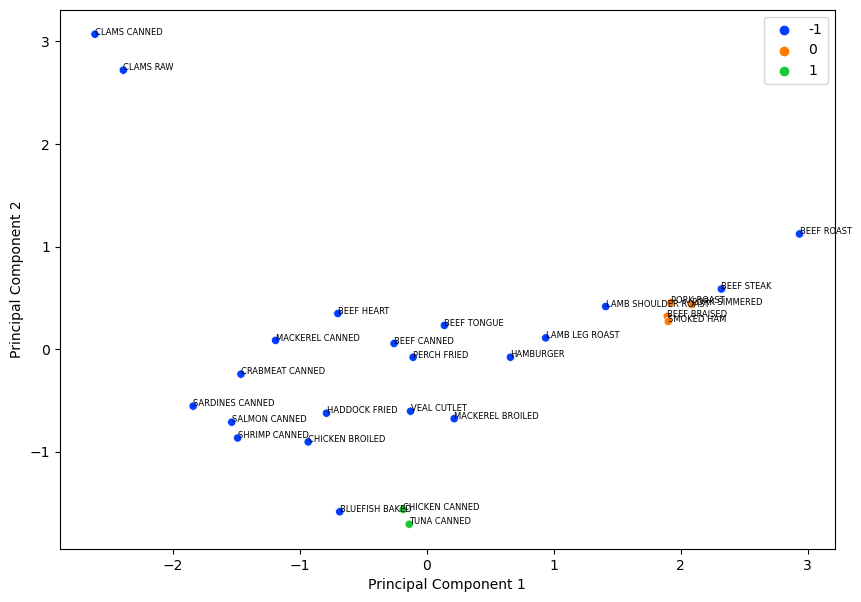

In [11]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette='bright',hue = clust_DB.labels_)
for i in np.arange(0,nutrient.shape[0]):
    plt.text(pca_result[i,0],pca_result[i,1],list(nutrient.index)[i],fontsize=6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()